Notebook used to train RF models from the training data.

Comments throughout explain where changes can be made to change what's being trained!

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as stat
import numpy as np 
#import forestsci
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from collections import Counter

import sys
sys.path.append("..")
import Utility.model_utils as model_utils

In [2]:
# Runtime Variables
number_trees = 100
seed = 72
min_leaf = 1
accuracy_array = []

# Data Input
filename = '../Results/training_data.csv'

# If saving model, set save to True and give meaningful name
model_name = 'RF_I_P.sav'
save = True


# Control what features are used by the model
label="Labels"
features=['area',
#        'equivalent_diameter', 
#        'orientation', 
    'major_axis_length',
    'minor_axis_length',
    'perimeter',
#        'min_intensity',
#        'mean_intensity',
        'max_intensity',
    'solidity',
    'major_axis_length/minor_axis_length',
    'perimeter/major_axis_length',
    'perimeter/minor_axis_length',
          'feret_diameter_max',
      'moments_hu-0',
      'moments_hu-1',
      'moments_hu-2',
      'moments_hu-3',
     # 'moments_hu-4',
      'moments_hu-5',
      #'moments_hu-6',
    'eccentricity'
         ]


In [3]:
best_f1 = 0
best_model = None
for seed in np.arange(100):
    # Read in data w/ features
    df = pd.read_csv(filename)

    # Modify Data (Remove illegal data OR set different runtime)

    
    # Change how data is grouped
    #df['Labels'].replace('Poorly Segmented', 'Incomplete', inplace=True) # Group Poorly Segmented and Incomplete as a single class
    df['Labels'].replace('Multiple Crystal', 'Crystal', inplace=True) # Group Multiple Crystal and Crystal as a single class
    #df['Labels'].replace('Crystal', 'Incomplete', inplace=True)
    #df = df[df['Labels'] != "Incomplete"] # Remove any data labeled as "Incomplete"
    df = df[df['Labels'] != "Crystal"]
    
    # Missed Labels: Purge any bad data that the model cannot run on
    df['Labels'].replace('', np.nan, inplace=True) 
    df.dropna(subset=['Labels'], inplace=True)
    # Numerical errors (divide by 0)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    for feature in features:
        df.dropna(subset=[feature],inplace=True)

    # Split Data
    X=df[features]
    y=df[label]
    
    print(Counter(y))

    # Encode
    ohe = OneHotEncoder(sparse=False)
    y = ohe.fit_transform(df[[label]])

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

    # Create RandomForestRegressor
    rfr=RandomForestRegressor(n_estimators = number_trees,min_samples_leaf=min_leaf, oob_score=False)
    rfr.fit(X_train,y_train)

    # Accuracy Checks
    y_pred=rfr.predict(X_test)
    y_pred = np.round(y_pred)
    
    accuracy = metrics.f1_score(y_test,y_pred,average='macro')
    accuracy_array.append(accuracy)
    #accuracy = metrics.accuracy_score(y_test,y_pred)
    print(f'{seed} Seed Completed')
    model_utils.success_of_guess(y_pred,y_test,ohe)
    print(f'Running Average F1: {np.average(accuracy_array)}, OOB Score: N/A')
    
    if accuracy > best_f1:
        best_model = rfr
        best_f1 = accuracy

Counter({'Incomplete': 210, 'Poorly Segmented': 203})
0 Seed Completed
Labels_Incomplete -> Precision = 0.7058823529411765, Recall = 0.5454545454545454, F1 = 0.6153846153846153
Labels_Poorly Segmented -> Precision = 0.574468085106383, Recall = 0.6923076923076923, F1 = 0.627906976744186
Macro F=0.6216457960644006
Run Accuracy : 0.6144578313253012
Running Average F1: 0.6216457960644006, OOB Score: N/A
Counter({'Incomplete': 210, 'Poorly Segmented': 203})
1 Seed Completed
Labels_Incomplete -> Precision = 0.6153846153846154, Recall = 0.75, F1 = 0.676056338028169
Labels_Poorly Segmented -> Precision = 0.813953488372093, Recall = 0.6862745098039216, F1 = 0.7446808510638299
Macro F=0.7103685945459994
Run Accuracy : 0.7108433734939759
Running Average F1: 0.6660071953052, OOB Score: N/A
Counter({'Incomplete': 210, 'Poorly Segmented': 203})
2 Seed Completed
Labels_Incomplete -> Precision = 0.5853658536585366, Recall = 0.5853658536585366, F1 = 0.5853658536585366
Labels_Poorly Segmented -> Precisi

21 Seed Completed
Labels_Incomplete -> Precision = 0.6585365853658537, Recall = 0.6136363636363636, F1 = 0.6352941176470588
Labels_Poorly Segmented -> Precision = 0.6153846153846154, Recall = 0.6153846153846154, F1 = 0.6153846153846154
Macro F=0.6253393665158371
Run Accuracy : 0.6144578313253012
Running Average F1: 0.6568106319304575, OOB Score: N/A
Counter({'Incomplete': 210, 'Poorly Segmented': 203})
22 Seed Completed
Labels_Incomplete -> Precision = 0.8108108108108109, Recall = 0.6666666666666666, F1 = 0.7317073170731707
Labels_Poorly Segmented -> Precision = 0.6666666666666666, Recall = 0.7894736842105263, F1 = 0.7228915662650601
Macro F=0.7272994416691154
Run Accuracy : 0.7228915662650602
Running Average F1: 0.65987536278866, OOB Score: N/A
Counter({'Incomplete': 210, 'Poorly Segmented': 203})
23 Seed Completed
Labels_Incomplete -> Precision = 0.7857142857142857, Recall = 0.5365853658536586, F1 = 0.6376811594202899
Labels_Poorly Segmented -> Precision = 0.660377358490566, Recall =

42 Seed Completed
Labels_Incomplete -> Precision = 0.6764705882352942, Recall = 0.6052631578947368, F1 = 0.6388888888888888
Labels_Poorly Segmented -> Precision = 0.7083333333333334, Recall = 0.7555555555555555, F1 = 0.7311827956989247
Macro F=0.6850358422939068
Run Accuracy : 0.6867469879518072
Running Average F1: 0.6525115287599629, OOB Score: N/A
Counter({'Incomplete': 210, 'Poorly Segmented': 203})
43 Seed Completed
Labels_Incomplete -> Precision = 0.7368421052631579, Recall = 0.6511627906976745, F1 = 0.6913580246913581
Labels_Poorly Segmented -> Precision = 0.6818181818181818, Recall = 0.75, F1 = 0.7142857142857143
Macro F=0.7028218694885362
Run Accuracy : 0.6987951807228916
Running Average F1: 0.6536549455947032, OOB Score: N/A
Counter({'Incomplete': 210, 'Poorly Segmented': 203})
44 Seed Completed
Labels_Incomplete -> Precision = 0.6470588235294118, Recall = 0.5365853658536586, F1 = 0.5866666666666668
Labels_Poorly Segmented -> Precision = 0.625, Recall = 0.7142857142857143, F1 

63 Seed Completed
Labels_Incomplete -> Precision = 0.7027027027027027, Recall = 0.5531914893617021, F1 = 0.6190476190476191
Labels_Poorly Segmented -> Precision = 0.5434782608695652, Recall = 0.6944444444444444, F1 = 0.6097560975609756
Macro F=0.6144018583042974
Run Accuracy : 0.6144578313253012
Running Average F1: 0.6545985021448024, OOB Score: N/A
Counter({'Incomplete': 210, 'Poorly Segmented': 203})
64 Seed Completed
Labels_Incomplete -> Precision = 0.6666666666666666, Recall = 0.5909090909090909, F1 = 0.6265060240963856
Labels_Poorly Segmented -> Precision = 0.6046511627906976, Recall = 0.6666666666666666, F1 = 0.6341463414634145
Macro F=0.6303261827799
Run Accuracy : 0.6265060240963856
Running Average F1: 0.6542250818468809, OOB Score: N/A
Counter({'Incomplete': 210, 'Poorly Segmented': 203})
65 Seed Completed
Labels_Incomplete -> Precision = 0.6, Recall = 0.6, F1 = 0.6
Labels_Poorly Segmented -> Precision = 0.6428571428571429, Recall = 0.627906976744186, F1 = 0.6352941176470588
M

84 Seed Completed
Labels_Incomplete -> Precision = 0.6176470588235294, Recall = 0.525, F1 = 0.5675675675675677
Labels_Poorly Segmented -> Precision = 0.6122448979591837, Recall = 0.6976744186046512, F1 = 0.6521739130434783
Macro F=0.609870740305523
Run Accuracy : 0.6144578313253012
Running Average F1: 0.6512844737128723, OOB Score: N/A
Counter({'Incomplete': 210, 'Poorly Segmented': 203})
85 Seed Completed
Labels_Incomplete -> Precision = 0.631578947368421, Recall = 0.6153846153846154, F1 = 0.6233766233766234
Labels_Poorly Segmented -> Precision = 0.6976744186046512, Recall = 0.6818181818181818, F1 = 0.6896551724137931
Macro F=0.6565158978952083
Run Accuracy : 0.6506024096385542
Running Average F1: 0.6513453042266204, OOB Score: N/A
Counter({'Incomplete': 210, 'Poorly Segmented': 203})
86 Seed Completed
Labels_Incomplete -> Precision = 0.6486486486486487, Recall = 0.5714285714285714, F1 = 0.6075949367088608
Labels_Poorly Segmented -> Precision = 0.6, Recall = 0.6585365853658537, F1 = 0

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Best Model F1: {best_f1}')
#print(best_model.oob_score_)
y_pred_best = np.round(best_model.predict(X_test))
print(f'R2: {best_model.score(X_test,y_test)}')
print(f'Accuracy: {accuracy_score(y_test,y_pred_best)}')
print(ohe.feature_names_in_)
count_fails = np.abs(y_pred_best-y_test)
ohe.get_feature_names_out(['Labels'])
print(np.sum(count_fails)/2,np.shape(count_fails)[0])

Best Model F1: 0.7415863602668643
R2: 0.7368870740305521
Accuracy: 0.963855421686747
['Labels']
3.0 83


In [5]:
# Feature Importances

from sklearn.inspection import permutation_importance
import time

start_time = time.time()
result = permutation_importance(best_model, X_test, y_test, n_repeats=20, random_state=seed, n_jobs=4)
elapsed_time = time.time() - start_time

print(f'Time elapsed: {elapsed_time}')
forest_importances = pd.Series(result.importances_mean, index=features)

Time elapsed: 1.7203619480133057


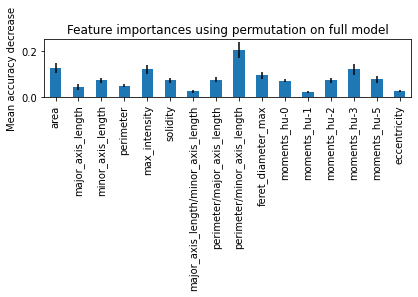

In [6]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [7]:
import pickle
if save:
    pickle.dump(best_model, open(model_name, 'wb'))